# Summary

## setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_excel('ABBREV.xlsx') # make this generalizable to universal source

In [3]:
Macros=df.loc[:,['Shrt_Desc', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)',
          'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'Sugar_Tot_(g)',
          'FA_Sat_(g)', 'FA_Mono_(g)', 'FA_Poly_(g)']]

# Data Exploration

## Univariate

### Histograms

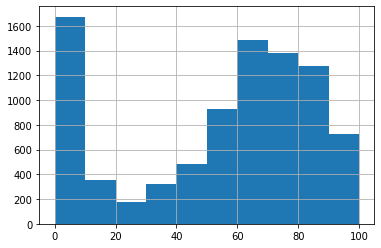

In [4]:
Macros['Water_(g)'].hist()

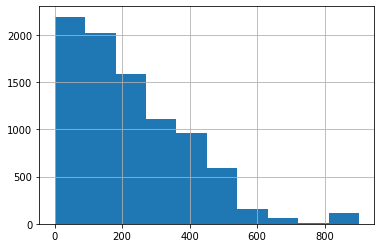

In [5]:
Macros['Energ_Kcal'].hist()

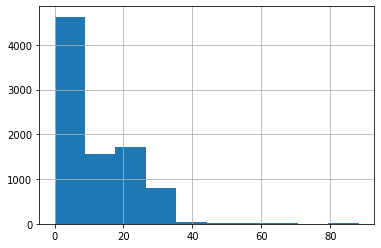

In [6]:
Macros['Protein_(g)'].hist()

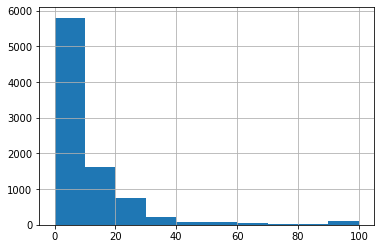

In [7]:
Macros['Lipid_Tot_(g)'].hist()

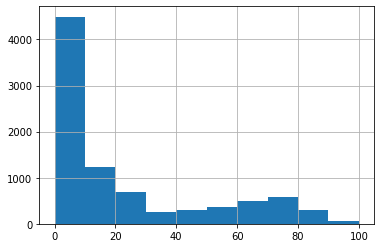

In [8]:
Macros['Carbohydrt_(g)'].hist()

## Filtering

In [9]:
list(Macros['Shrt_Desc'][Macros['Protein_(g)']>80.00]) # How to Filter!

['EGG,WHITE,DRIED,PDR,STABILIZED,GLUCOSE RED',
 'EGG,WHITE,DRIED',
 'EGG,WHITE,DRIED,STABILIZED,GLUCOSE RED',
 'SOY PROTEIN ISOLATE',
 'SOY PROT ISOLATE,K TYPE',
 'GELATINS,DRY PDR,UNSWTND',
 'SEAL,BEARDED (OOGRUK),MEAT,DRIED (ALASKA NATIVE)']

## Multivariate Analysis

Corr Plot (easiest)

In [10]:
data=Macros.loc[:, Macros.columns != 'Shrt_Desc'] # append back to short descp on index
# Everything but this column

In [11]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Sugar_Tot_(g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g)
Water_(g),1.00,-0.90,-0.10,-0.49,-0.77,-0.51,-0.37,-0.39,-0.41
Energ_Kcal,-0.90,1.00,0.11,0.81,0.49,0.35,0.62,0.69,0.61
Protein_(g),-0.10,0.11,1.00,0.06,-0.30,-0.30,0.04,0.07,-0.06
Lipid_Tot_(g),-0.49,0.81,0.06,1.00,-0.05,-0.00,0.77,0.89,0.71
Carbohydrt_(g),-0.77,0.49,-0.30,-0.05,1.00,0.68,-0.05,-0.10,0.05
Sugar_Tot_(g),-0.51,0.35,-0.30,-0.00,0.68,1.00,0.07,-0.07,-0.01
FA_Sat_(g),-0.37,0.62,0.04,0.77,-0.05,0.07,1.00,0.52,0.26
FA_Mono_(g),-0.39,0.69,0.07,0.89,-0.10,-0.07,0.52,1.00,0.57
FA_Poly_(g),-0.41,0.61,-0.06,0.71,0.05,-0.01,0.26,0.57,1.00


# Missing Data

### Identify

In [12]:
df.apply(pd.isna, axis=1)

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8786,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
8787,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
8788,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [13]:
Macros[Macros.isnull().any(axis=1)]

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Sugar_Tot_(g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g)
7,"CHEESE,CARAWAY",39.28,376,25.18,29.20,3.06,NaN,18.584,8.275,0.830
9,"CHEESE,CHESHIRE",37.65,387,23.37,30.60,4.78,NaN,19.475,8.671,0.870
20,"CHEESE,GJETOST",13.44,466,9.65,29.51,42.65,NaN,19.160,7.879,0.938
38,"CHEESE,ROQUEFORT",39.38,369,21.54,30.64,2.00,NaN,19.263,8.474,1.320
40,"CHEESE,TILSIT",42.86,340,24.41,25.98,1.88,NaN,16.775,7.136,0.721
...,...,...,...,...,...,...,...,...,...,...
8531,"RESTAURANT,CHINESE,EGG ROLLS,ASSORTED",50.60,250,8.28,11.94,27.29,NaN,2.116,3.036,5.601
8535,"CRACKER BARREL,COUNTRY FRIED SHRIMP PLATTER",46.08,287,12.62,16.77,21.40,NaN,3.064,3.787,8.519
8536,"CRACKER BARREL,FARM RAISED CATFISH PLATTER",52.32,266,22.94,17.05,5.31,NaN,3.249,4.577,7.612
8538,"CRACKER BARREL,GRILLED SIRLOIN STEAK",59.40,203,31.52,8.52,0.00,NaN,3.045,3.405,0.742


### Fill

In [14]:
Macros.fillna(0, inplace=True)

In [15]:
# Fill and replace ('reassign')
Macros.loc[:, Macros.columns != 'Shrt_Desc']= Macros.loc[:, Macros.columns != 'Shrt_Desc'].fillna(0)

## Clustering

Cluster by NLP on short descriptions later

## Standardize Data

In [ ]:
data=Macros.loc[:, Macros.columns != 'Shrt_Desc'] # append back to short descp on index
# Everything but this column

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,8.789000e+03,8.790000e+03,8.790000e+03,8.790000e+03,8.790000e+03,6.958000e+03,8.441000e+03,8.124000e+03,8.125000e+03
mean,8.329515e-17,-2.720867e-16,-2.505896e-16,4.319639e-16,-3.177170e-15,-2.711861e-15,-2.409846e-16,4.235083e-17,1.051877e-16
std,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000072e+00,1.000059e+00,1.000062e+00,1.000062e+00
min,-1.758540e+00,-1.332316e+00,-1.077206e+00,-6.673684e-01,-8.114522e-01,-5.724935e-01,-5.486476e-01,-5.821419e-01,-4.388534e-01
25%,-7.933488e-01,-7.966052e-01,-8.511828e-01,-6.072948e-01,-8.096186e-01,-5.724935e-01,-5.148972e-01,-5.485130e-01,-3.966701e-01
50%,2.914352e-01,-2.079124e-01,-3.174633e-01,-3.423387e-01,-4.689421e-01,-4.491902e-01,-3.044179e-01,-3.056214e-01,-3.054008e-01
75%,7.750058e-01,6.515792e-01,8.107553e-01,2.002205e-01,4.687434e-01,4.988653e-02,1.179216e-01,1.474958e-01,-3.983768e-02
max,1.491262e+00,3.977694e+00,7.310358e+00,5.656166e+00,2.855679e+00,6.115370e+00,1.411741e+01,1.135582e+01,1.386953e+01


## Fitting K-means algorithm

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list

from sklearn.cluster import KMeans

SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# View curve for elbow method

In [ ]:
# Fitting

# k means using 20 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 20, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [ ]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

### Merge Labels back on to original dataset

In [ ]:
clustered_data=pd.merge(Macros, frame, left_index=True, right_index=True)

In [ ]:
# Find means
clustered_data.groupby('cluster').mean()

In [ ]:
# Prepare to get Corr Plot

cluster_numerics=clustered_data.loc[:,['cluster', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)',
       'Carbohydrt_(g)', 'Sugar_Tot_(g)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)']]

# Get Corr plot

cluster_numerics.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

# Linear Regression

## Questions
How to do feature engineering from here?

combine which similar categories to better understand how the Kmeans clustering worked
Linear Regression

should be able to make a perfect calculation for total calories from Protein, Fat, Carbohydrates

Validate and test effectiveness of method

drop unnecessary features like Saturated Fat, Total Sugar that's redundant from Carbohydrates.
see which type of penalized regression can completely drop them (I think it's lasso)

**Reference** https://scikit-learn.org/stable/modules/linear_model.html

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns!='Energ_Kcal'] , data.loc[:,'Energ_Kcal'], test_size=0.33, random_state=0)

## Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
>>> reg = LinearRegression().fit(X_train, y_train)
>>> print(reg.score(X_train, y_train))
>>> print(reg.coef_)
>>> print(reg.intercept_)

In [ ]:
reg.score(X_test, y_test) # pretty darn good!

## Ridge Regression

In [ ]:
>>> from sklearn import linear_model
ridgey=linear_model.Ridge(alpha=.5) # what does this hyperparameter mean?
ridgey.fit(X_train, y_train)
print(ridgey.coef_)
print(ridgey.intercept_)

## Cross Validation

In [ ]:
>>> Cross_reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
>>> print(Cross_reg.fit(X_train, y_train))
>>> print(Cross_reg.alpha_)